In [1]:
%cd 'drive/My Drive/bank'

/content/drive/My Drive/bank


In [2]:
import datetime
from copy import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras import layers, models

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
now = datetime.datetime.now()

In [4]:
train_df = pd.read_csv('dataset/train_nn22_2254.csv')
test_df = pd.read_csv('dataset/test_nn22_2254.csv')

In [5]:
ID = test_df['id']
x = train_df.drop(columns=['y', 'id'])
y = train_df['y']
test_df = test_df.drop(columns=['y', 'id'])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=18)

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((21680, 55), (21680,), (5420, 55), (5420,))

In [8]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=18)

# NN-MODEL

In [9]:
input_features = len(x.columns)
input_features

55

In [22]:
model = models.Sequential()

model.add(layers.Dense(128, input_shape=(input_features, ), activation='swish', name='input_layer'))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(64, activation='swish',  name='hidden1'))
model.add(layers.Dropout(0.15))
model.add(layers.Dense(32, activation='swish', name='hidden2'))
model.add(layers.Dropout(0.15))
model.add(layers.Dense(16, activation='swish', name='hidden3'))
model.add(layers.Dropout(0.15))
model.add(layers.Dense(8, activation='swish',  name='hidden4'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid', name='output_layer'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 128)               7168      
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
hidden2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
hidden3 (Dense)              (None, 16)               

In [23]:
optimizer = tf.keras.optimizers.Adam(0.001)
loss = 'binary_crossentropy',
metrics = ['accuracy']
bs = 64
ep = 10000

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [24]:
cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1000, restore_best_weights=True)

In [25]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test) , callbacks=cb, batch_size=bs, epochs=ep, verbose=0)

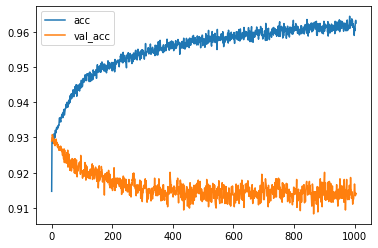

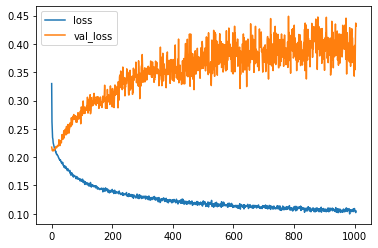

In [26]:
pd.DataFrame({'acc': history.history['accuracy'], 
           'val_acc': history.history['val_accuracy']}).plot()
pd.DataFrame({'loss': history.history['loss'], 
           'val_loss': history.history['val_loss']}).plot()

In [27]:
pred_nn = model.predict(test_df)
nn_p = pd.DataFrame(pred_nn)

In [ ]:
submission = pd.DataFrame({
    'ID': ID,
    'nn': nn_p[0]
    })
submission.head()

,ID,nn
0,0,0.919810
1,1,0.035763
2,2,0.045107
3,3,0.024040
4,4,0.054110


In [ ]:
now = datetime.datetime.now()

file_name = 'submit/submit_NN' + now.strftime('%d_%H%M') + '.csv'

submission.to_csv(file_name, index=False, header=False)

In [ ]:
model.save('models/nn_model_0.8250201.h5')